In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Fourier Series


If the force $\bf{F}$ acting on a particle is always restorative, then the resulting motion will be periodic, just not necissarily harmonic. For example, a potential of the form 
\begin{equation}
    V(x) = \frac{1}{2}k|x|^{p}
\end{equation}
for $p=10$. This potential procdeces motion looking like a series of pyramids as within the walls the paricle is mostly free. 

Assume that the period of oscillation is $T$ such that 
\begin{equation}
    y(t+T) = y(t) 
\end{equation} 

This tells us the *true* frequencty 
\begin{equation}
    \omega \equiv \omega_1 = \frac{2\pi}{T} 
\end{equation}

Such a periodic function can be expanded as a series of harmonic functions with fequencies that are multiples of $\omega$. That is, 
\begin{equation}
    y(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty}\left(a_n\cos n\omega t + b_n\sin n\omega t \right)
\end{equation}

The intensity or power of each frequency $n\omega$ is proportional to $a_n^2+b_n^2$. 

The expansion coefficients can be solved via integration. Namely 
\begin{equation}
    \begin{pmatrix}a_n \\ b_n \end{pmatrix} = \frac{2}{T}\int_0^{T}dt\begin{pmatrix} \cos n\omega t \\ \sin n\omega t \end{pmatrix} y(t)
\end{equation}

Using symmetry, we can often coefficients without the need to calculate. For example 
1. For *odd functions* i.e. functions satisfying $y(-t)= -y(t)$, $a_n=0$ $\forall n$
2. For *even functions* i.e. functions satisfying $y(-t) = y(t)$, $b_n = 0$ $\forall n$ 


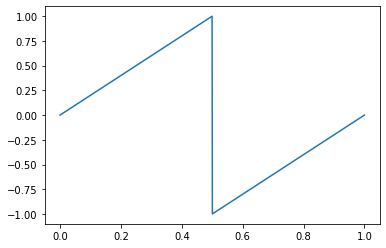

In [2]:
# Ex: Sawtooth 
T = 1 
def sawtooth(t): 
    if t <= T/2: 
        return t/(T/2) 
    else: 
        return (t-T)/(T/2)
    
ts = np.linspace(0, T, 1000) 
y = [sawtooth(t) for t in ts]

plt.figure()
plt.plot(ts,y) 
plt.show()

This function is clearly odd about T/2, and therefore we need only calculate $b_n$. We have 
\begin{equation}
    b_n = \frac{2}{T}\int_{-T/2}^{T/2}dt \sin n \omega t \frac{t}{T/2} = \frac{2}{n\pi}(-1)^{n+1} 
\end{equation}

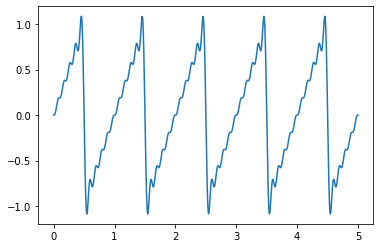

In [3]:
def bn(t, n): 
    return (2/(n*np.pi))*(-1)**(n+1)*np.sin(n*(2*np.pi/T)*t)


N = 10

ts = np.linspace(0, 5*T, 1000)
y = [np.sum([bn(t, n) for n in range(1, N+1)]) for t in ts]

plt.figure()
plt.plot(ts, y) 
plt.show()

# Fourier Transforms

Fourier series are great for approximating periodic signals. The *Fourier Transform* is the right tool for analyzing nonperiodic functions. 

Suppose instead of only allowing the discrete multiples of the fundamental frequency $\omega_n = n\omega$ we actually had a continuous spectrum of possible frequencies. Our previous coefficients $a_n, b_n$ are now represented by a frequency-dependent function $Y(\omega)$ such that 
\begin{equation}
    y(t) = \mathcal{F}^{-1}\left[Y(\omega)\right] = \int_{-\infty}^{\infty} d\omega\; Y(\omega)\frac{e^{i\omega t}}{\sqrt{2\pi}}
\end{equation}

Where we have used the complex exponential to compacitfy the expression. We have called this the inverse fourier transformation $\mathcal{F}^{-1}$ because, like before, we solfe for the coefficients (now a function) via an integral. That is 
\begin{equation}
    Y(\omega) = \mathcal{F}\left[y(t)\right] = \int_{-\infty}^{\infty}dt\; y(t)\frac{e^{-i\omega t}}{\sqrt{2\pi}}
\end{equation}

The factor of $1/\sqrt{2\pi}$ is common for normalization in Quantum Mechanics but may be chosen differently depending on the context. 

Because the function $Y(\omega)$ is often complex and tends to vary by many orders of magnitude, it is common to plot the *power spectrum* 
\begin{equation}
    |Y(\omega)|
\end{equation} 
on a semi-log plot. 

A fast algorithm for computing the Fourier Transform of a discrete sampling of a signal is called the *Fast Fourier Transform (FFT)* and is demonstrated below: 

[467 481 495 505 519 533]


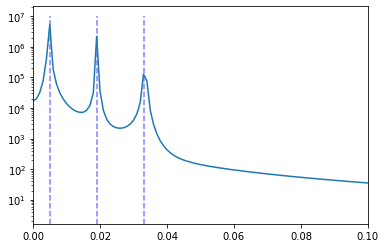

In [35]:
# demo 
from scipy.signal import find_peaks


ts = np.linspace(0, 30, 1000) 
y = 5*np.sin(ts)-3*np.cos(4*ts)+np.sin(7*ts)

spec = np.fft.fft(y) 
freqs = np.fft.fftfreq(ts.shape[-1])
sort = np.argsort(freqs)
spec = spec[sort]
freqs = freqs[sort]


power = np.abs(spec)**2 
peaks = find_peaks(power)
print(peaks[0])
plt.figure()
plt.semilogy(freqs, power)
plt.xlim(0, 0.1)
plt.vlines(freqs[peaks[0]], ymin=0, ymax=10**7, color='b', linestyle = '--', alpha=0.5)
plt.show()


# NOTE: the horizontal line at the bottom of the graph occurs without
# sorting the frequencies first 

# Noise reduction via Autocorrelation

Suppose that the signal we measure $y(t)$ is a combination of a true signal $s(t)$ and some undesirable noise $n(t)$, e.g. 
\begin{equation}
    y(t) = s(t) + n(t) 
\end{equation}

If the noise is truly random, there should be no correlation between the true signal $s(t)$ and $n(t)$. To measure this, we define the correlation function $c(\tau)$ for two signals $x(t), y(t)$ as 
\begin{equation}
    c(\tau) = \int_{-\infty}^{\infty}dt y^{*}(t)x(t+\tau) \equiv \int_{-\infty}^{\infty} dty^{*}(t-\tau)x(t)
\end{equation}
e.g. $c(\tau)$ measures how much overlap there is between the two signals as a function of the lag time $\tau$ between them. 

It turns out that the Fourier transorm can aid us in the calculation of the correlation function. Using the transform on the definition of the correlation function leads to the identity 
\begin{equation}
    C(\omega) = \sqrt{2\pi}\;Y^{*}(\omega)X(\omega)
\end{equation}
In other words, *the Fourier transform of the correlation function is proportional to the product of the transform of one signal with the conjugate of the transform of the other*. 

### Autocorrelation 
Now that we understand the correlation of two signals, we can define the *autocorrelation* as the correlation of a signal with itself. That is, 
\begin{equation}
    A(\tau) = \int_{-\infty}^{\infty}dt y^{*}(t)y(t+\tau)
\end{equation}

The Fourier transform of $A(\tau)$ obeys 
\begin{equation}
    A(\omega) = \sqrt{2\pi}\;|y(\omega)|^2
\end{equation}

returning to our original signal, we can now see that if we consider the true signal *and* the noise, the autocorrelation becomes 
\begin{align}
    A_y(\tau) &= \int_{-\infty}^{\infty}dt \Big(s^{*}(t)+n^{*}(t)\Big)\Big(s(t+\tau)+ n(t+\tau)\Big) \\ 
    &= \int_{-\infty}^{\infty} dt\; s^{*}(t)s(t+\tau) + n^{*}(t)s(t+\tau) + s^{*}(t)n(t+\tau) + n^{*}(t)n(t+\tau)\\
    &= A_s(\tau) + c_{s,n}(\tau) + c_{n,s}(\tau) + A_n(\tau)
\end{align}
Because truley random noise will be uncorrelated with the signal and itself, we expect that the last three terms go to zero so that 
\begin{equation}
    A_y(\tau) \approx A_s(\tau)
\end{equation}
Thus if you expect truly random noise, calculate the autocorrelation function and then fourier transform back! 

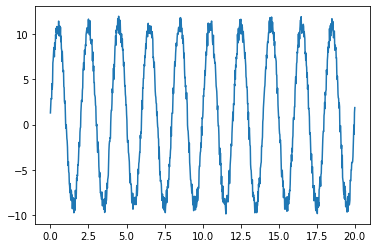

In [59]:
# first, let's make a noisy sine wave
def noisySine(x): 
    return 10*np.sin(np.pi*x)+ 2*np.random.rand(x.shape[0])

xs = np.linspace(0, 20, 1000) 
ys = noisySine(xs)

plt.figure()
plt.plot(xs, ys) 
plt.show()

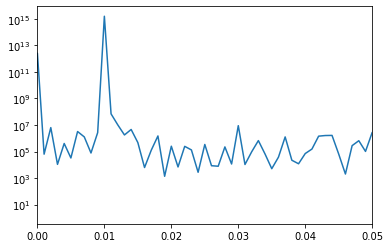

In [60]:
# now let's compute the autorrelation

spec = np.fft.fft(ys) 
freqs = np.fft.fftfreq(ts.shape[-1])
sort = np.argsort(freqs)
spec = spec[sort]
freqs = freqs[sort]
S = np.abs(spec)**2 
A = np.sqrt(2*np.pi)*np.abs(S)**2

plt.figure()
plt.semilogy(freqs, A)
plt.xlim(0, .05)
plt.show()

# Filtering via convolution 

Similar to the correlation of two functions, we can define the action of a filter $g(t)$ on a function $f(t)$ via the *convolution* 
\begin{equation}
    (f\star g)(\tau) = \int_{-\infty}^{\infty}dt\; f(t)g(\tau - t).
\end{equation}
Again, this equation has a simple counterpart in reciprocal space: 
\begin{equation}
    \mathcal{F}\left[ f\star g \right] = \sqrt{2\pi}\;f(\omega)g(\omega)
\end{equation}